<h2>
    Nama : Meita Aryani
    NIM  : 09011381823106
    
     SVM(Support Vector Machine)

<h3> Introduction

<h3>Face Recognition Using SVM Master

<h4> 
            manusia memiliki bentuk wajah yang berbeda-beda,perbedaan inilah yang menjadikannya salah satu identitas setiap manusia.
wajah sebagai objek dua dimensi digambarkan dengan berbagai macam iluminasi, pose dan ekspresi wajah untuk diindetifikasi berdasarkan citra dua dimensi dari wajah tersebut.
Pada dasarnya, sistem pengenalan wajah bekerja dengan membandingka citra masukan(input) dengan citra yang telah tersimpan dalam sebuah database dan menemukan kecocokan wajah yang paling sesuai dengan data masukan yang ada sebelumnya.
Hal ini berarti masalah pengenalan wajah dapat digunakan dengan menggunakan algoritma atau metode klasifikasi. Salah satu algoritma yang mampu menyelesaikan masalah klasifikasi dengan baik adalah Support Vector Machine.
SVM bekerja dengan cara mendefinisikan batas antara dua kelas dengan jarak maksimal dari data yang  terdekat,  jarak maksimal  ini  didapatkan  dengan menemukan hyperplane(garis pemisah) terbaik pada input  space yang diperoleh dengan mengukur margin hyperplane,  margin merupakan jarak antara hyperplane dengan titik terdekat dari masing-masing kelas.

<h3> Import Libraries

In [15]:
%pylab inline
import numpy as np
import sklearn as sk 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces()
print(faces.DESCR)

Populating the interactive namespace from numpy and matplotlib
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**D

<h3> Import Dataset

In [2]:
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)


dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)


In [3]:
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

1.0
0.0
0.5470426


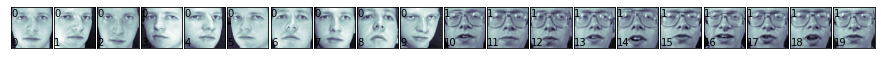

In [4]:
def print_faces(images,target , top_n):
    ##set up figure size in inches
    fig=plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0 , right=1 ,bottom=0, top=1, hspace=0.05,wspace=0.05)
    for  i in range(top_n):
        #we will print images in matrix 20x20
        p=fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)
        #label the image with target value
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))
        
print_faces(faces.images,faces.target,20)
    

In [5]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print (svc_1)

SVC(kernel='linear')


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=0.25, random_state=0)

In [21]:
from sklearn.model_selection import cross_val_score
from scipy.stats import poisson

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores)))

In [27]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [28]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         

In [29]:
# the index ranges of images of people with glasses
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

In [30]:
def create_target(segments):
    # create a new y array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [31]:
target_glasses = create_target(glasses)

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, target_glasses, test_size=0.25, random_state=0)

In [33]:
svc_2 = SVC(kernel='linear')
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


In [34]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]

print (y_test.shape[0])

select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

print (y_train.shape[0])

10
390


In [35]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)
y_pred = svc_3.predict(X_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion Matrix:
[[5 0]
 [1 4]]


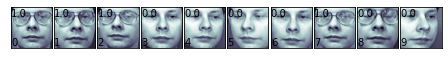

In [36]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)

<h3> Explanation

<h4> 
    Pada dataset diatas menggunakan metode SVM(Support Vector Machine) dan menggunakan Kernel Linear. Support Vector Machine (SVM) adalah suatu teknik untuk melakukan prediksi, baik dalam kasus klasifikasi maupun regresi, namun SVM telah dikembangkan agar dapat bekerja pada problem non-linier dengan memasukkan konsep kernel pada ruang kerja berdimensi tinggi. Pada ruang berdimensi tinggi, akan dicari hyperplane (hyperplane) yang dapat memaksimalkan jarak (margin) antara kelas data. 
   
    Model yang digunakan untuk menyelesaikan masalah model linear adalah
    model kombinasi linear dari fungsi basis berikut :
    
    





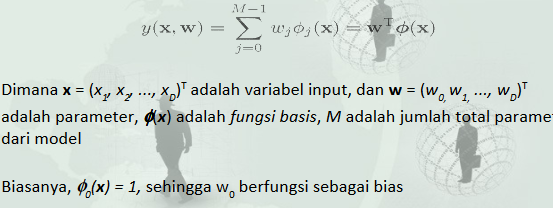

<h3> Conclussion

<h4>
    Dataset Ini adalah klasifikasi wajah sederhana menggunakan dataset wajah Oliviet dan Support Vector Machine. Telah melatih pengklasifikasi SVM untuk mengklasifikasikan wajah. Datasetnya adalah set data wajah Oliviet yang dapat diimpor dalam scikit learn. Setelah pelatihan, model dapat mengenali wajah dengan akurasi 99%, menggunakan kernel linear. 

<h3> Referensi

<h4> Dataset : https://github.com/urvishp80/Face-recognition-using-SVM